# **크루즈선의 승무원 수 예측** 

---
## **문제 정의 및 데이터**

> **프로젝트 개요**

```
선박 제조회사는 안정적인 운항을 위해 적절한 승무원이 필수적입니다. 그런데 출항 전에는 승무원 수를 예측 할 수 없기 때문에 인력 운영을 효율적으로 하기 힘든 상황입니다. 
선박회사는 수집된 데이터를 바탕으로 크루즈선에 필요한 승무원 수를 예측하여 인력운영을 효율화하고자 합니다
```

> **데이터**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/cruise_info.csv")
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


* 데이터 Description
-Age 
-Tonnage (1000s of Tons) 배의 부피
-Passengers (100s)
-Length (100s of feet)
-Cabins (100s)
-Passenger Density (Passengers/Space)

## **프로젝트 목표 정의**
> **문제정의**

``` 
🤘 승무원 인력 비효율로 인해 운영 비용 상승
```  
 
> **가설검정**

```
🤘 승객수, 선실 정보 등으로 적절한 승무원 수가 예측 가능할까 -> 운영 비용 절감
```

> **해결방안**

```
🤘 승무원 수 예측을 통해 인력 운영 조정정
- 1. 데이터 전처리 및 탐색적 데이터 분석
- 2. lineplot, heatmap을 이용한 승무원수 상관관계 분석석
- 3. 머신러닝 알고리즘을 활용하여 승무원수 예측 모델 구축
```

> **효과검증**

```
🤘 승무원 수 예측량에 따른 운영 조정 후 운영 비용 모니터링 
```

## Step1. 탐색적 데이터 분석(EDA)

### ·  기본정보 파악
- Data shape, type 확인
- 결측치 확인
- 이상치 확인

### · 목표변수 분포

- target변수인 'crew'의 데이터 분포 파악

In [2]:
df.shape

(158, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


<Axes: xlabel='crew', ylabel='Count'>

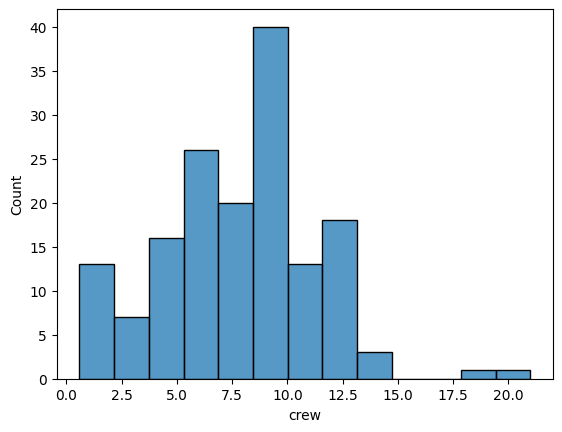

In [4]:
sns.histplot(df['crew'])

In [5]:
df['crew'].skew()

0.19478713071101847

### · 기술통계량 확인

In [6]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,158.0,15.689873,7.615691,4.000,10.0000,14.000,20.0000,48.00
Tonnage,158.0,71.284671,37.229540,2.329,46.0130,71.899,90.7725,220.00
passengers,158.0,18.457405,9.677095,0.660,12.5350,19.500,24.8450,54.00
length,158.0,8.130633,1.793474,2.790,7.1000,8.555,9.5100,11.82
cabins,158.0,8.830000,4.471417,0.330,6.1325,9.570,10.8850,27.00
passenger_density,158.0,39.900949,8.639217,17.700,34.5700,39.085,44.1850,71.43
crew,158.0,7.794177,3.503487,0.590,5.4800,8.150,9.9900,21.00


### . 결측치 처리

In [8]:
df.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

### . 이상치 분석 및 처리

<Axes: >

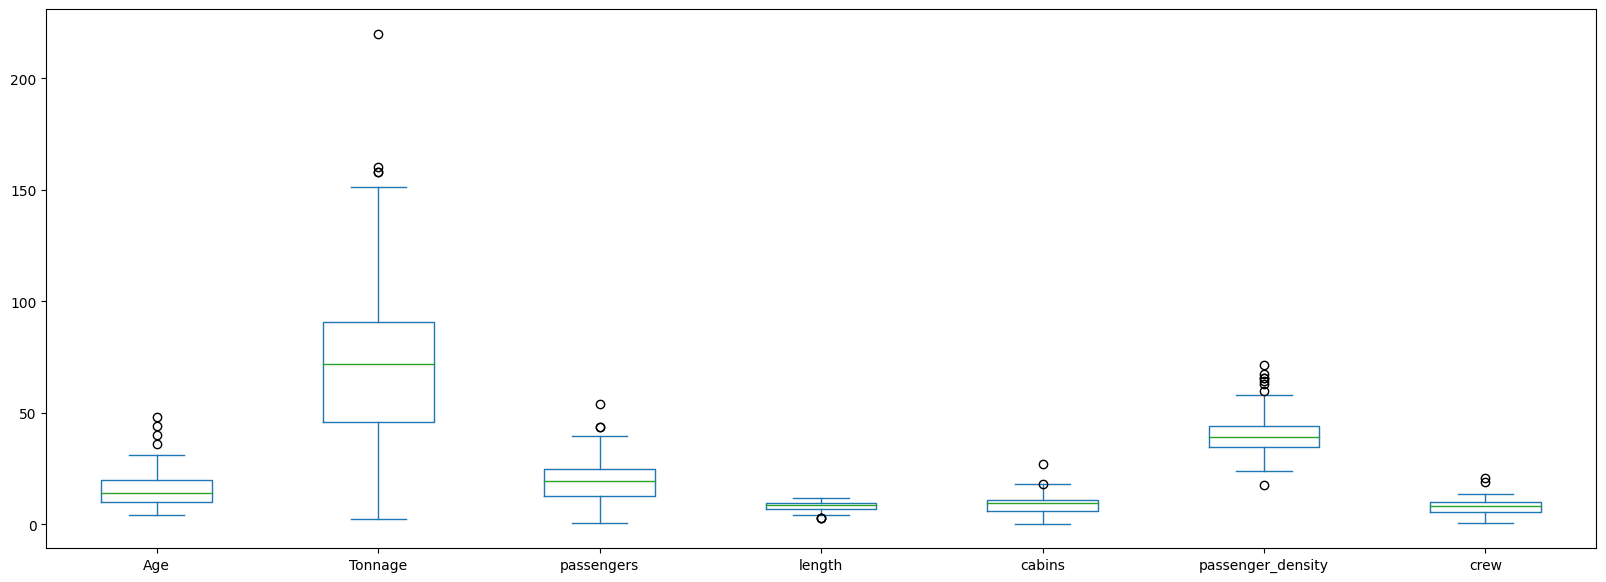

In [12]:
df.plot(kind='box', figsize=(20,7))

### . 피쳐 분포 파악하기

<Axes: xlabel='Age', ylabel='Count'>

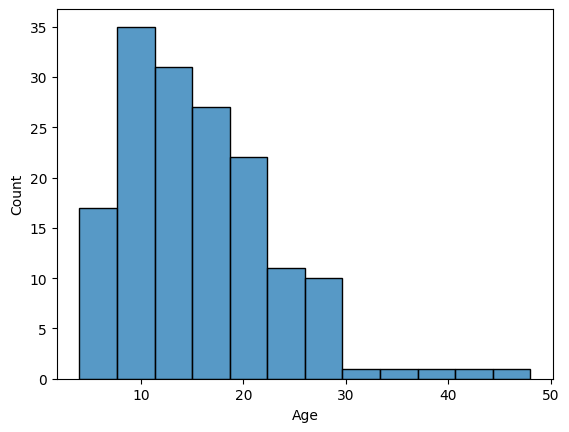

In [13]:
sns.histplot(df['Age'])

### . Cruise_line 과 승무원 수

In [14]:
df['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Seabourn              3
Windstar              3
Cunard                3
Disney                2
Crystal               2
Azamara               2
Orient                1
Name: Cruise_line, dtype: int64

<Axes: xlabel='crew', ylabel='Cruise_line'>

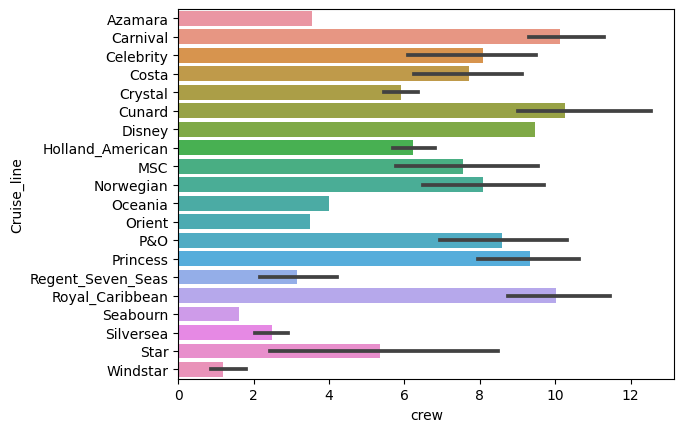

In [15]:
sns.barplot(x=df['crew'], y=df['Cruise_line'])

## Step2. 상관관계분석

### · 상관분석1
- lineplot으로 상관분석

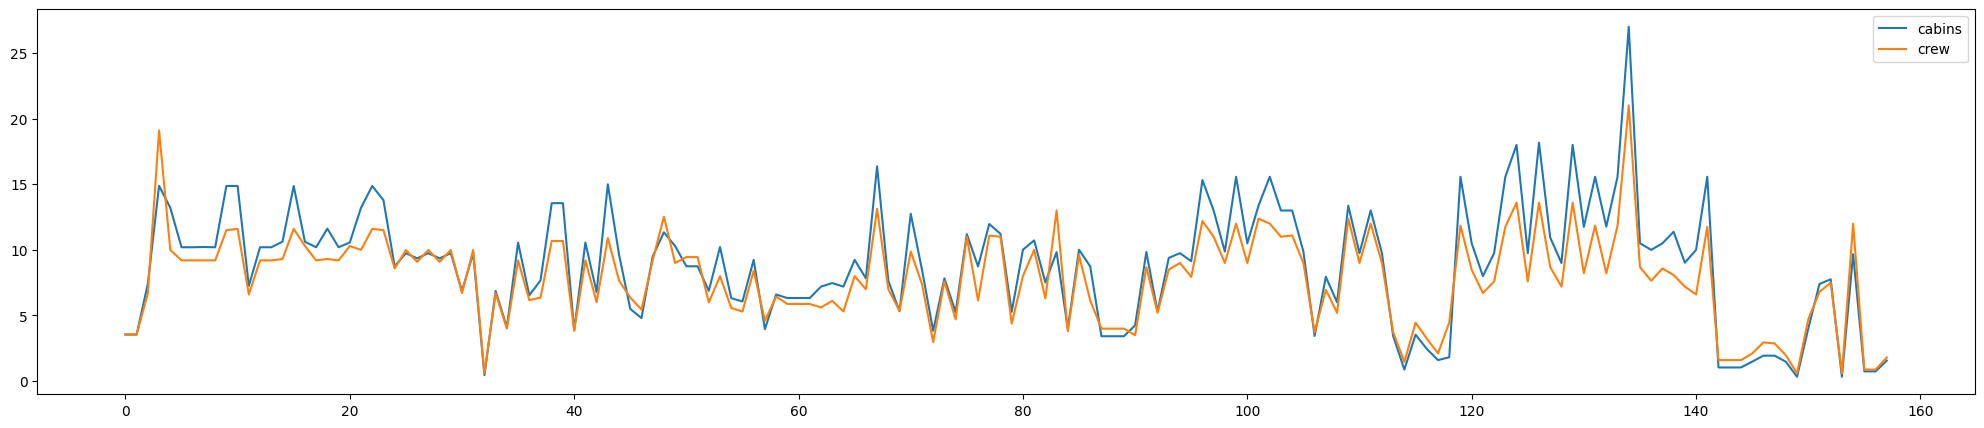

In [19]:
# cabins 와 crew 상관분석

plt.figure(figsize=(25,5))
plt.plot(df['cabins'], label='cabins')
plt.plot(df['crew'], label='crew')
plt.legend()


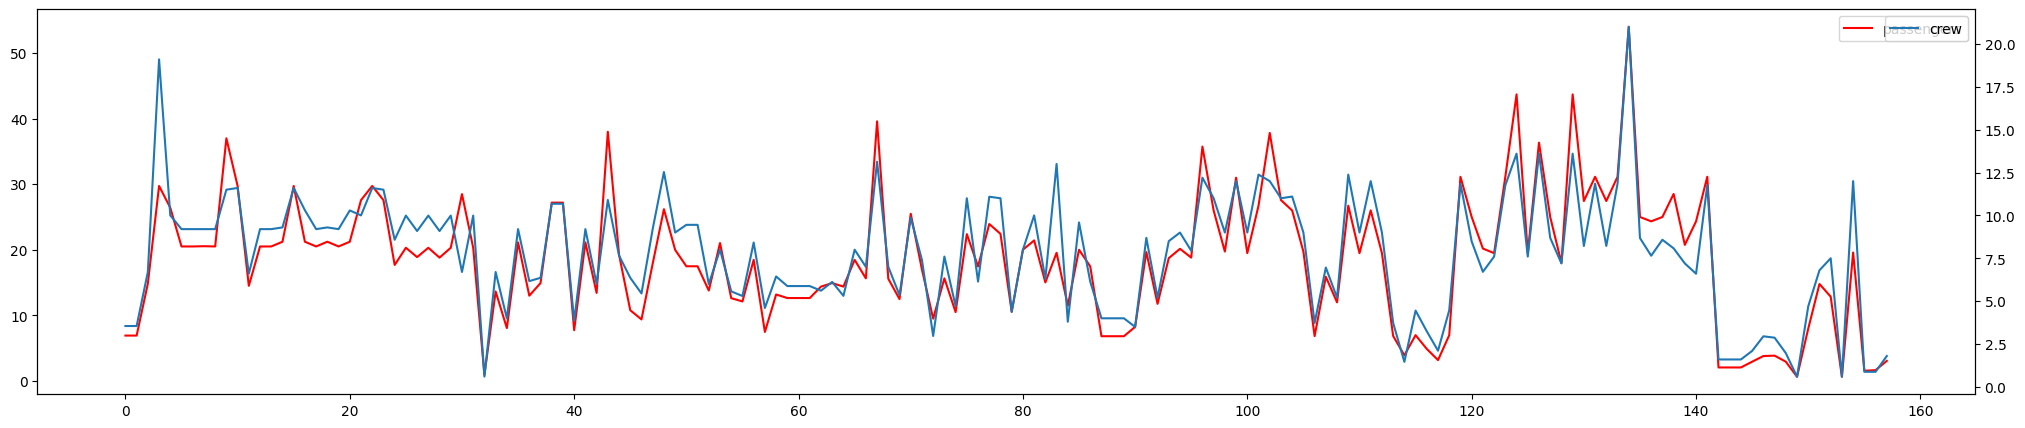

In [23]:
# cabins 와 crew 상관분석

plt.figure(figsize=(25,5))
plt.plot(df['passengers'], label='passengers', color='red')
plt.legend()
plt.twinx()
plt.plot(df['crew'], label='crew')
plt.legend()

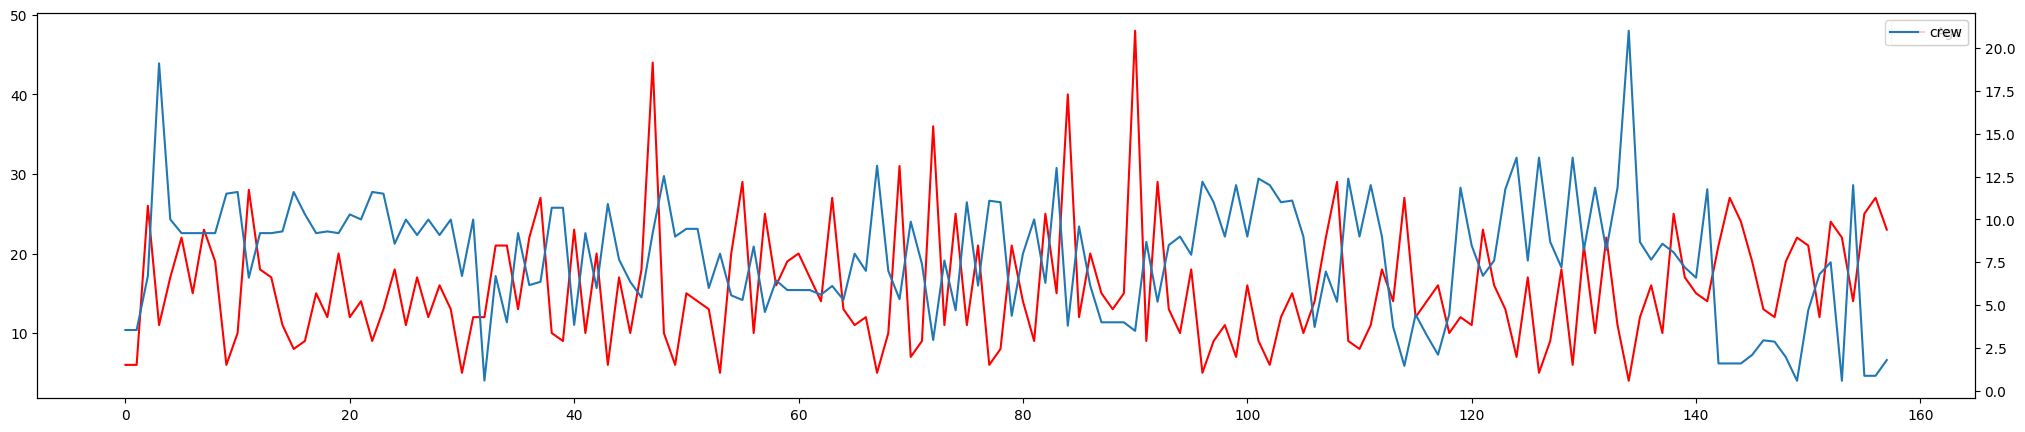

In [24]:
# cabins 와 crew 상관분석

plt.figure(figsize=(25,5))
plt.plot(df['Age'], label='Age', color='red')
plt.legend()
plt.twinx()
plt.plot(df['crew'], label='crew')
plt.legend()

### · 상관분석2
- heatmap으로 상관분석

<ipython-input-27-038fc9e360ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

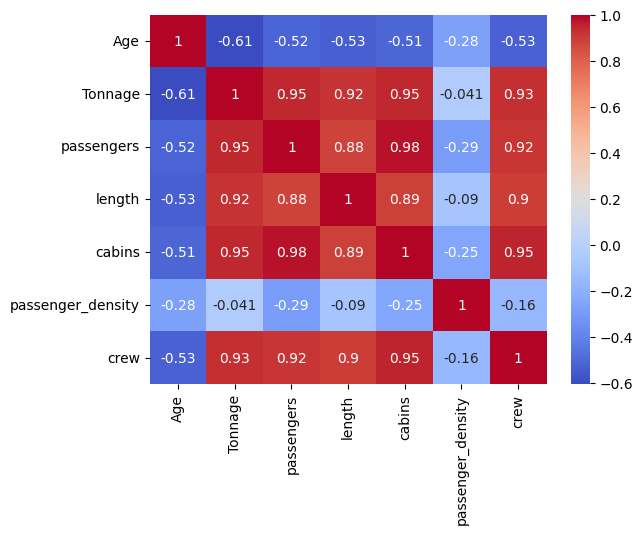

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

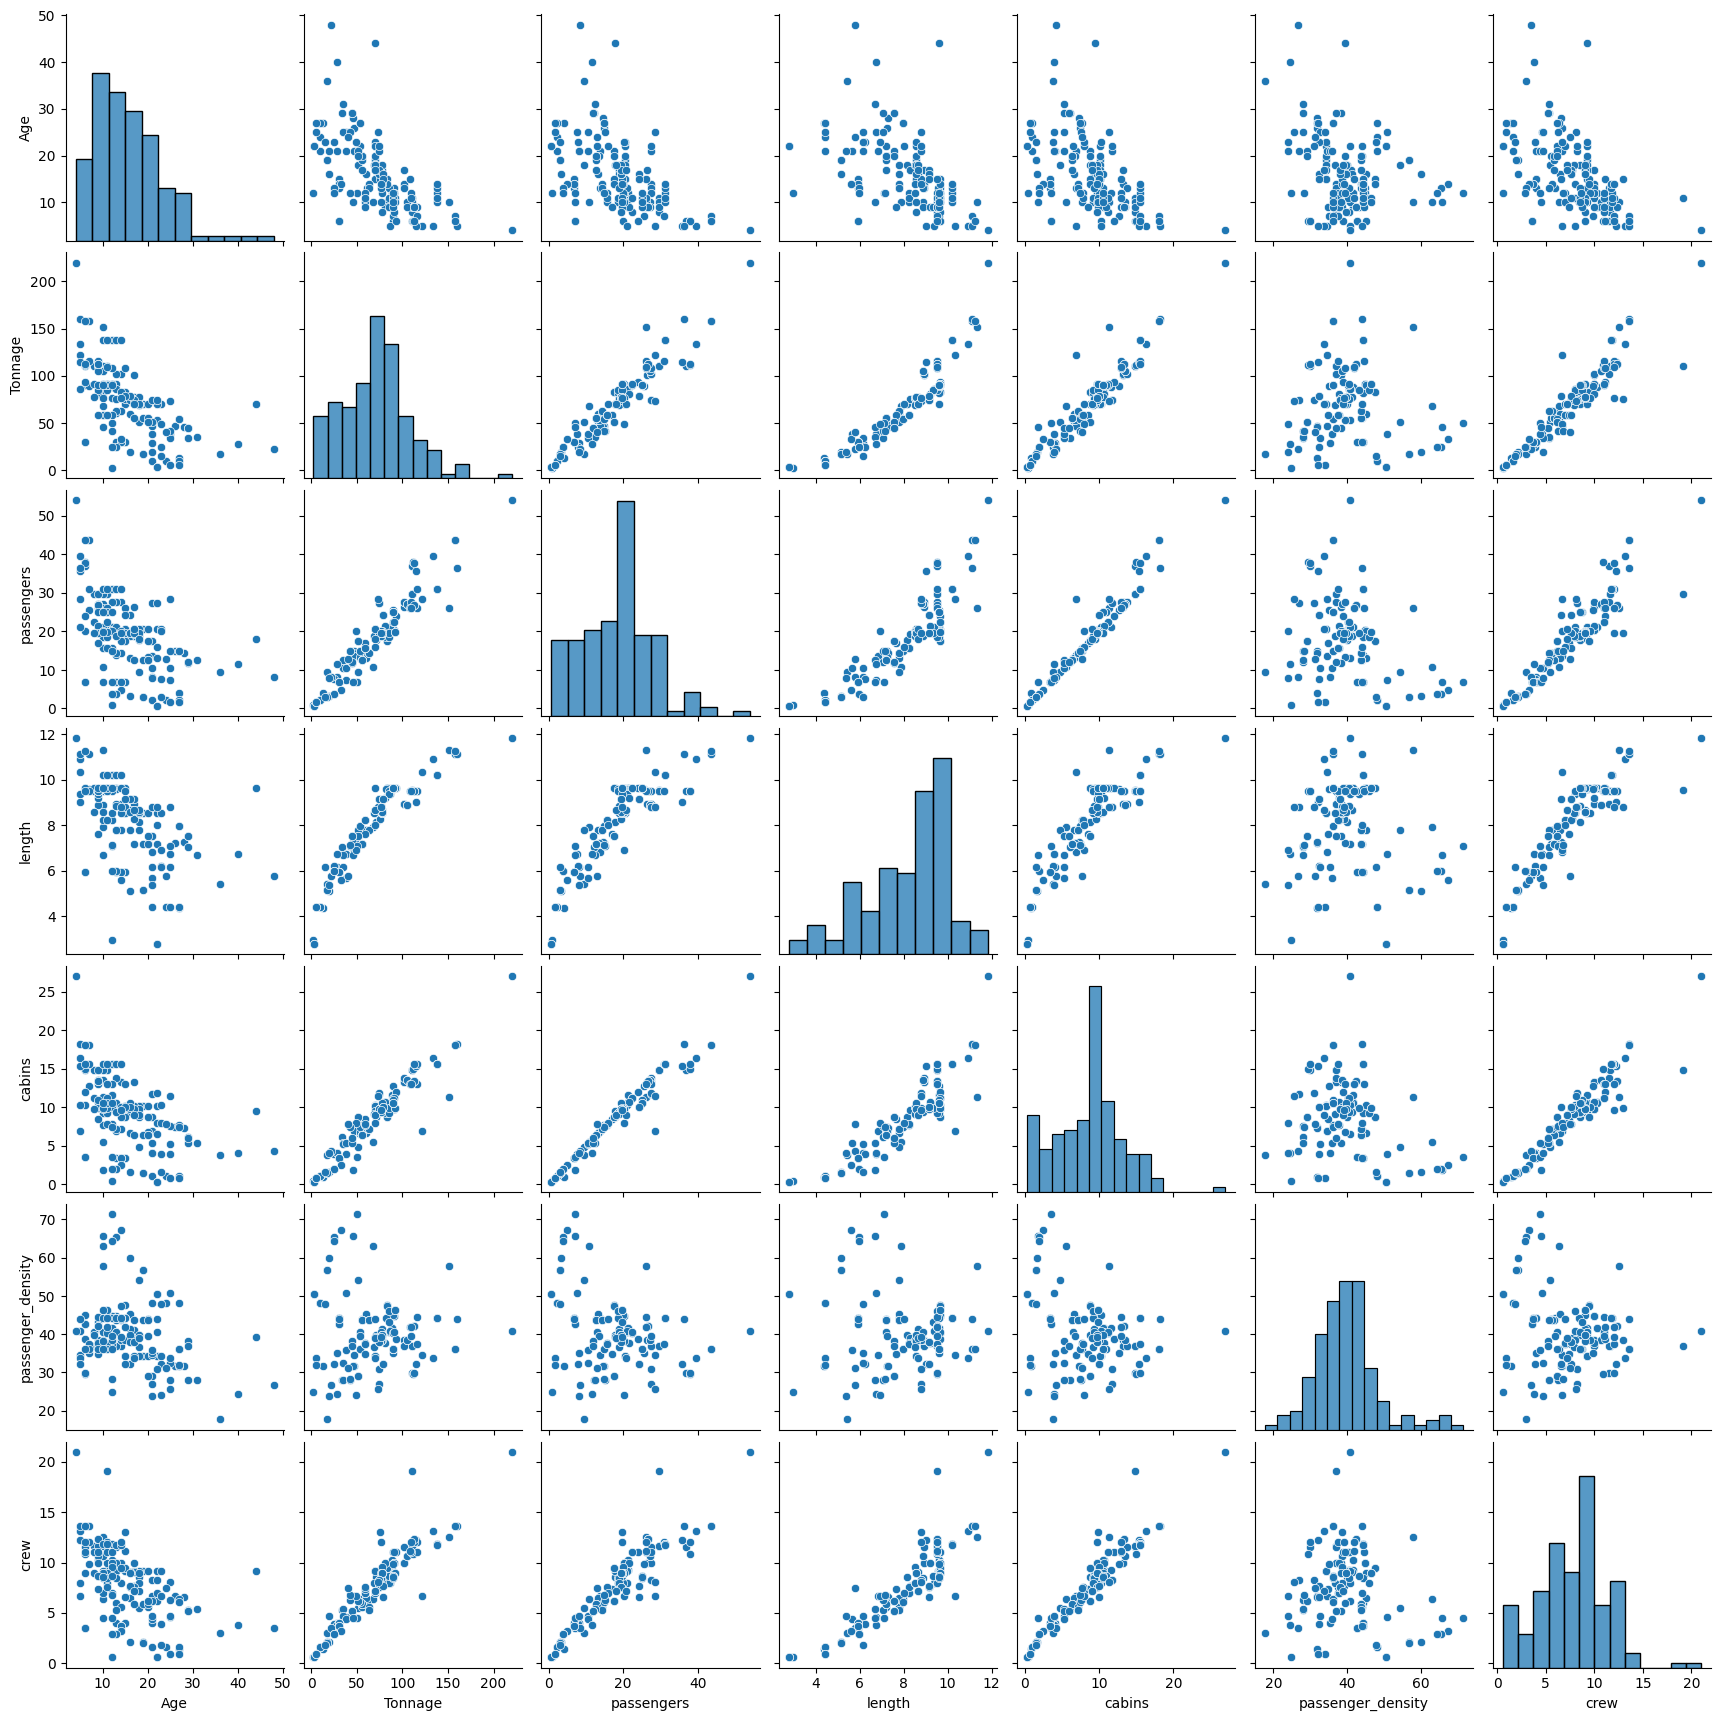

In [28]:
sns.pairplot(df)

In [29]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [ ]:
# 'Tonnage', 'passengers', 'length', 'cabins' 상관계수가 0.9 이상 - 다중공선성 
# 회귀계수의 해석을 어렵게 하고, 방법1. 제거.

## Step3. 머신러닝 활용한 승무원 예측

1. **데이터 읽기:** <br>


2. **데이터 정제:** <br>


3. **데이터 시각화:** EDA<br>


4. **데이터 전처리:** <br>
    1) feature 추출 <br>
    2) x와 y로 분리<br>

5. **머신러닝 모델 학습:** 분류 모델<br>
    1) 베이스라인 모델 - 선형회귀<br>
    2) 성능 개선 I  - 독립변수 추가 <br>
    3) 성능 개선 II  - 표준화 <br>
    4) 성능 개선 III - RandomForestRegressor <br>

6. **평가 및 예측:** <br>
    1) MAE, R2 <br>
    2) 그래프 <br>


### . 베이스라인 모델 (linear regression)
- 범주형 독립변수 (Cruise_line) 을 제외한 모든 독립변수 사용
- linear regression

> **1. 데이터셋 분할**


In [30]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [31]:
X = df.drop(['Ship_name', 'Cruise_line','crew'], axis=1)
y = df['crew']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1234)


> **2. 모델 정의 및 학습**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression ()
lr.fit(X_train, y_train)

> **3. 예측 및 평가**

In [33]:
pred = lr.predict(X_test)

# mae, mse, r2 
from sklearn import metrics

print("MAE : ", metrics.mean_absolute_error(y_test, pred))
print("MSE : ", metrics.mean_squared_error(y_test, pred))
print("R2  : ", metrics.r2_score(y_test, pred))

MAE :  0.5469362727670756
MSE :  0.5118456265847396
R2  :  0.9410211483869184


In [35]:
X.columns

Index(['Age', 'Tonnage', 'passengers', 'length', 'cabins',
       'passenger_density'],
      dtype='object')

In [34]:
lr.coef_

array([-0.01106641,  0.01411843, -0.15767025,  0.35606243,  0.84321047,
        0.00104681])

In [ ]:
# 다중공선성

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_corr = df.drop(columns='crew').corr()
vif_data = pd.DataFrame()
vif_data["variable"] = df_corr.columns

vif_data["VIF"] = [variance_inflation_factor(df_corr.values, i) for i in range(len(df_corr.columns))]

print(vif_data)
# VIF 지수가 10 이상이면 다중공선성이 있다라고 봄

            variable          VIF
0                Age    15.018264
1            Tonnage  5945.894277
2         passengers  7070.336223
3             length   327.608244
4             cabins  4015.207348
5  passenger_density   109.242393


<ipython-input-37-83f4ec740561>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.drop(columns='crew').corr()


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_corr = df.drop(columns=['crew','passengers','Tonnage','length']  ).corr()
vif_data = pd.DataFrame()
vif_data["variable"] = df_corr.columns

vif_data["VIF"] = [variance_inflation_factor(df_corr.values, i) for i in range(len(df_corr.columns))]

print(vif_data)

            variable       VIF
0                Age  6.669691
1             cabins  6.431997
2  passenger_density  3.590931


<ipython-input-40-d20fb190e28b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.drop(columns=['crew','passengers','Tonnage','length']  ).corr()


### . 성능 개선 I (Feature추가)

> **1. 데이터셋 분할**

- Cruise_line 을 원핫인코딩

> **2. 모델 정의 및 학습**

> **3. 예측 및 평가**

### . 성능 개선 II (표준화)

### . 성능 개선 III (RandomForestRegressor)

> **피쳐 중요도**

### · 모델 Save
- 최종 모델을 저장 및 다시 불러오기